In [1]:
# jupyter notebook to run on google collab
# Will train a CNN model for quick doodles base on google quickdraw data set

In [2]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf 

In [3]:
# set up limited category list
categories = ['snake','bat','bird','camel','cat','cow','crab','dog','dragon','elephant','fish','frog','giraffe','horse','mouse','shark','apple','banana','grapes','pear','pineapple','strawberry','airplane','bicycle','bus','car','submarine','truck','van','sailboat','train']


In [4]:
!mkdir npy

In [5]:
cat_limit = categories[:30]
cat_limit

['snake',
 'bat',
 'bird',
 'camel',
 'cat',
 'cow',
 'crab',
 'dog',
 'dragon',
 'elephant',
 'fish',
 'frog',
 'giraffe',
 'horse',
 'mouse',
 'shark',
 'apple',
 'banana',
 'grapes',
 'pear',
 'pineapple',
 'strawberry',
 'airplane',
 'bicycle',
 'bus',
 'car',
 'submarine',
 'truck',
 'van',
 'sailboat']

In [6]:
# download npy data from google
import urllib.request
def download():
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  counter = 1
  for i in cat_limit:
    space = i.replace('_', '%20')
    path = base+space+'.npy'
    print(f'{path} {counter}/{len(cat_limit)}')
    counter += 1
    urllib.request.urlretrieve(path, 'npy/'+i+'.npy')
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/snake.npy 1/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bat.npy 2/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bird.npy 3/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/camel.npy 4/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cat.npy 5/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cow.npy 6/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/crab.npy 7/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dog.npy 8/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dragon.npy 9/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/elephant.npy 10/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/fish.npy 11/30
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/frog.npy 12/30
https://storage.googl

In [7]:
all_files = glob.glob(os.path.join('npy', '*.npy'))

In [8]:
# load all files downlad in collab
# Join all of them in X and y
X = np.empty([0, 784])
y = np.empty([0])
async_categories = []

for idx, file in enumerate(all_files):
  data = np.load(file)
  data = data[0: 16000, :]
  labels = np.full(data.shape[0], idx)

  X = np.concatenate((X, data), axis=0)
  y = np.append(y, labels)
  
  category, extension = os.path.splitext(os.path.basename(file))
  async_categories.append(category)

banana


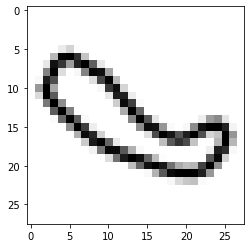

In [9]:
# Test a random image
import matplotlib.pyplot as plt
%matplotlib inline
testIndex=1000
plt.imshow(X[testIndex].reshape(28,28), cmap='binary')
print(async_categories[int(y[idx].item())])


In [10]:
async_categories

['banana',
 'shark',
 'truck',
 'bird',
 'cow',
 'dog',
 'horse',
 'elephant',
 'pineapple',
 'apple',
 'grapes',
 'strawberry',
 'bus',
 'crab',
 'camel',
 'giraffe',
 'snake',
 'car',
 'bat',
 'cat',
 'frog',
 'van',
 'mouse',
 'airplane',
 'fish',
 'sailboat',
 'dragon',
 'bicycle',
 'submarine',
 'pear']

In [11]:
# Scramble data a split data into test and train set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=24)

In [12]:
# Normalize to 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [13]:
# reshape input
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [14]:
X_train.shape[0]

384000

In [15]:
X_train.shape

(384000, 28, 28, 1)

In [16]:
# one hot encode y category
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(async_categories))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(async_categories))

In [17]:
print(f'{y_test.shape}.{y_train.shape}')
print(f'{X_test.shape},{X_train.shape}')
y_train.shape

(96000, 30).(384000, 30)
(96000, 28, 28, 1),(384000, 28, 28, 1)


(384000, 30)

In [18]:
# set up model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=X_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(async_categories), activation='softmax'))

# top_k=tf.keras.metrics.top_k_categorical_accuracy(k=3)
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          3

In [19]:
# train model
model.fit(x=X_train, y=y_train, batch_size=256, validation_split=0.1, verbose=2, epochs=8)

Epoch 1/8
1350/1350 - 9s - loss: 1.2555 - accuracy: 0.6353 - val_loss: 0.8811 - val_accuracy: 0.7387
Epoch 2/8
1350/1350 - 9s - loss: 0.7921 - accuracy: 0.7638 - val_loss: 0.7448 - val_accuracy: 0.7769
Epoch 3/8
1350/1350 - 9s - loss: 0.6852 - accuracy: 0.7944 - val_loss: 0.6864 - val_accuracy: 0.7954
Epoch 4/8
1350/1350 - 9s - loss: 0.6241 - accuracy: 0.8115 - val_loss: 0.6582 - val_accuracy: 0.8029
Epoch 5/8
1350/1350 - 9s - loss: 0.5801 - accuracy: 0.8238 - val_loss: 0.6570 - val_accuracy: 0.8024
Epoch 6/8
1350/1350 - 9s - loss: 0.5458 - accuracy: 0.8327 - val_loss: 0.6461 - val_accuracy: 0.8093
Epoch 7/8
1350/1350 - 9s - loss: 0.5153 - accuracy: 0.8413 - val_loss: 0.6484 - val_accuracy: 0.8073
Epoch 8/8
1350/1350 - 9s - loss: 0.4882 - accuracy: 0.8489 - val_loss: 0.6487 - val_accuracy: 0.8127


In [20]:
# evaluate model
score = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))

3000/3000 [==============================] - 6s 2ms/step - loss: 0.6476 - accuracy: 0.8129
Test accuracy: 81.29%


In [34]:
# save and covert model with tensorflowjs
!pip install tensorflowjs

     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 92kB 3.8MB/s 
     |████████████████████████████████| 144.4MB 114kB/s 
     |████████████████████████████████| 256kB 51.8MB/s 
     |████████████████████████████████| 921kB 52.9MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=28f617682bfa8f7b975e41c982696f9119158f66a517d401686326e83367cda9
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tensorflow-hub 0.8.0
    Uninstalling tensorflow-hub-0.8.0:
      Successfully uninstalled tensorflow-hub-0.8.0
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation

In [36]:
import json
with open('easyCategories.json', 'w') as outputFile:
  json.dump(async_categories, outputFile)

In [37]:
model.save('kerasEasy30_ver2.h5')

In [38]:
!mkdir model

In [39]:
!tensorflowjs_converter --input_format keras kerasEasy30_ver2.h5 model/

In [40]:
!cp easyCategories.json model/easyCategories.json

In [41]:
!zip -r modelEasy30_ver2.zip model

  adding: model/ (stored 0%)
  adding: model/easyCategories.json (deflated 46%)
  adding: model/group1-shard1of1.bin (deflated 7%)
  adding: model/model.json (deflated 87%)


In [ ]:
from google.colab import files
files.download('modelEasy30.zip')

In [29]:
ones =np.ones([28,28])
ones=ones.reshape(1,28,28,1)
model.predict(ones)

array([[0.02976173, 0.00521549, 0.03880269, 0.02081672, 0.01554635,
        0.04821545, 0.02835448, 0.1195489 , 0.00601889, 0.00950548,
        0.13610965, 0.00592991, 0.08776312, 0.03884516, 0.02105447,
        0.01004505, 0.0051024 , 0.06252667, 0.05235381, 0.00473287,
        0.03498382, 0.09226883, 0.01975525, 0.00689708, 0.00394559,
        0.00384679, 0.06649587, 0.00530068, 0.0092143 , 0.01104247]],
      dtype=float32)

In [30]:
zeros =np.zeros([28,28])
zeros=zeros.reshape(1,28,28,1)
model.predict(zeros)

array([[0.03748277, 0.05103352, 0.03753025, 0.10061171, 0.02849682,
        0.0181957 , 0.04055725, 0.02064783, 0.013049  , 0.01791842,
        0.0377751 , 0.01604728, 0.02343873, 0.02597049, 0.01219068,
        0.03633172, 0.0191812 , 0.03719921, 0.07304627, 0.03606874,
        0.03265548, 0.03480417, 0.04497977, 0.05807493, 0.0463791 ,
        0.00861024, 0.01847744, 0.03150827, 0.01812468, 0.02361332]],
      dtype=float32)

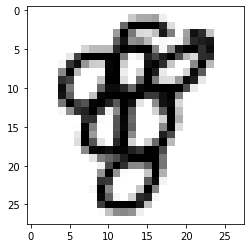

In [31]:
testI=25
plt.imshow(X_test[testI].reshape(28,28), cmap='binary')

In [32]:
prediction = model.predict(tf.expand_dims(tf.reshape(X_test[testI],[28,28,1]),0))
i=0
maxI = 0
max = prediction[0][0]
for i in range(len(prediction[0])):
  if (prediction[0][i]>max):
    max = prediction[0][i]
    maxI=i
  i+=1
print(async_categories[maxI])
# print(categories[y_test[150]])
print(max)
for ind in range(len(y_test[testI])):
  if y_test[testI][ind]==1:
    print(async_categories[ind])

grapes
0.9998017
grapes


In [33]:
# convol1=model.layer[0]
# convol1.get_weights()